In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [3]:
ls data

men_shoes.csv


In [6]:
df = pd.read_csv("data/men_shoes.csv", low_memory=False)
df.shape

(18280, 48)

In [7]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [8]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [9]:
y_true = df['prices_amountmin']
y_true.shape

(18280,)

In [10]:
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

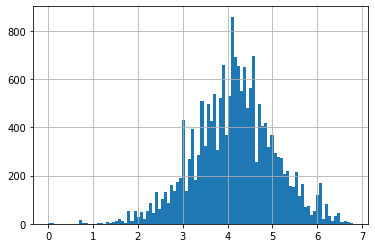

In [11]:
np.log1p( df['prices_amountmin']).hist(bins=100)

In [12]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [13]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))

y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [14]:
df.brand.value_counts()

Nike               1709
PUMA                574
Ralph Lauren        524
New Balance         361
VANS                356
                   ... 
Fashion Helpers       1
Zorrie                1
Hulkamania            1
Mcnett                1
Maxx                  1
Name: brand, Length: 1856, dtype: int64

In [0]:
#  nadanie brandom liczb (id)
df['brand_cat'] = df['brand'].factorize()[0]

In [21]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)
  

In [54]:
feats = ['brand_cat']
run_model(feats)

(-58.38655694633361, 4.223555478221712)

In [52]:
df['categories_cat'] = df['categories'].factorize()[0]
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

(-59.82560591635895, 3.4214679298235415)

In [55]:
feats = ['manufacturer_cat']
run_model(feats)

(-63.133649278023746, 3.394307434888982)

In [56]:
feats = ['categories_cat']
run_model(feats)

(-59.82560591635895, 3.4214679298235415)

In [57]:
feats = ['manufacturer_cat', 'brand_cat']
run_model(feats)

(-58.53930419908598, 4.311223231615446)

In [58]:
feats = ['categories_cat', 'brand_cat']
run_model(feats)

(-58.489604578725846, 6.135642974334137)

In [59]:
feats = ['categories_cat', 'manufacturer_cat', 'brand_cat']
run_model(feats)

(-58.32663007803053, 6.22220608739611)

In [0]:
!git add 